In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import itertools
import numpy as np
import torch as tr
import pandas as pd
from matplotlib import pyplot as plt

from CSWSEM import *

gs_name = 'pdim1'

In [3]:
sem_kwargs={
  'nosplit':0,
  'lmda':0.1,
  'alfa':100,
  'seed':-99,
  'rnn_kwargs': {
    'stsize':-99,
    'pdim':-99,
    'learn_rate':0.05
  }
}

In [4]:
def run_batch_exp(num_seeds,sem_kwargs,exp_kwargs):
  """ wrap wround seeds for single paramconfig
  """
  batch_dataL = []
  for seed in range(num_seeds):
    print('seed',seed)
    sem_kwargs['seed'] = seed
    # run
    sem = SEM(**sem_kwargs)
    task = CSWTask()
    exp,curr = task.generate_experiment(**exp_kwargs)
    sem_data = sem.forward_exp(exp,curr)
    # record
    sem.data.record_exp('condition',exp_kwargs['condition'])
    # collect
    sem_data_df = pd.DataFrame(sem_data,dtype='float64')
    batch_dataL.append(sem_data_df)
  return pd.concat(batch_dataL)

def run_BIexp(num_seeds,sem_kwargs,ntrain=160,ntest=40):
  """ wrap around task conditions
  """
  exp_dataL = []
  exp_kwargs = {'n_train':ntrain,'n_test':ntest}
  for cond in ['blocked','interleaved']:
    exp_kwargs['condition'] = cond
    batch_data = run_batch_exp(num_seeds,sem_kwargs,exp_kwargs)
    exp_dataL.append(batch_data)
  return pd.concat(exp_dataL)

In [5]:
## gridsearch
pdimL = [2,4,6]
stsizeL = [4,6,8]
num_seeds = 5

gsdataL = []
for idx,(pdim,stsize) in enumerate(itertools.product(pdimL,stsizeL)):
  print((pdim,stsize))
  sem_kwargs['rnn_kwargs']['pdim'] = pdim
  sem_kwargs['rnn_kwargs']['stsize'] = stsize
  
  exp_data = run_BIexp(num_seeds,sem_kwargs)
  gsdataL.append(exp_data)
    
gsdata = pd.concat(gsdataL)

(2, 4)
seed 0
seed 1
seed 2
seed 3
seed 4
seed 0
seed 1
seed 2
seed 3
seed 4
(2, 6)
seed 0
seed 1
seed 2
seed 3
seed 4
seed 0
seed 1
seed 2
seed 3
seed 4
(2, 8)
seed 0
seed 1
seed 2
seed 3
seed 4
seed 0
seed 1
seed 2
seed 3
seed 4
(4, 4)
seed 0
seed 1
seed 2
seed 3
seed 4
seed 0
seed 1
seed 2
seed 3
seed 4
(4, 6)
seed 0
seed 1
seed 2
seed 3
seed 4
seed 0
seed 1
seed 2
seed 3
seed 4
(4, 8)
seed 0
seed 1
seed 2
seed 3
seed 4
seed 0
seed 1
seed 2
seed 3
seed 4
(6, 4)
seed 0
seed 1
seed 2
seed 3
seed 4
seed 0
seed 1
seed 2
seed 3
seed 4
(6, 6)
seed 0
seed 1
seed 2
seed 3
seed 4
seed 0
seed 1
seed 2
seed 3
seed 4
(6, 8)
seed 0
seed 1
seed 2
seed 3
seed 4
seed 0
seed 1
seed 2
seed 3
seed 4


In [6]:
gsdata = gsdata.groupby(['condition','trial','stsize','pdim']).mean().reset_index()

4 2
6 2
8 2
4 4
6 4
8 4
4 6
6 6
8 6


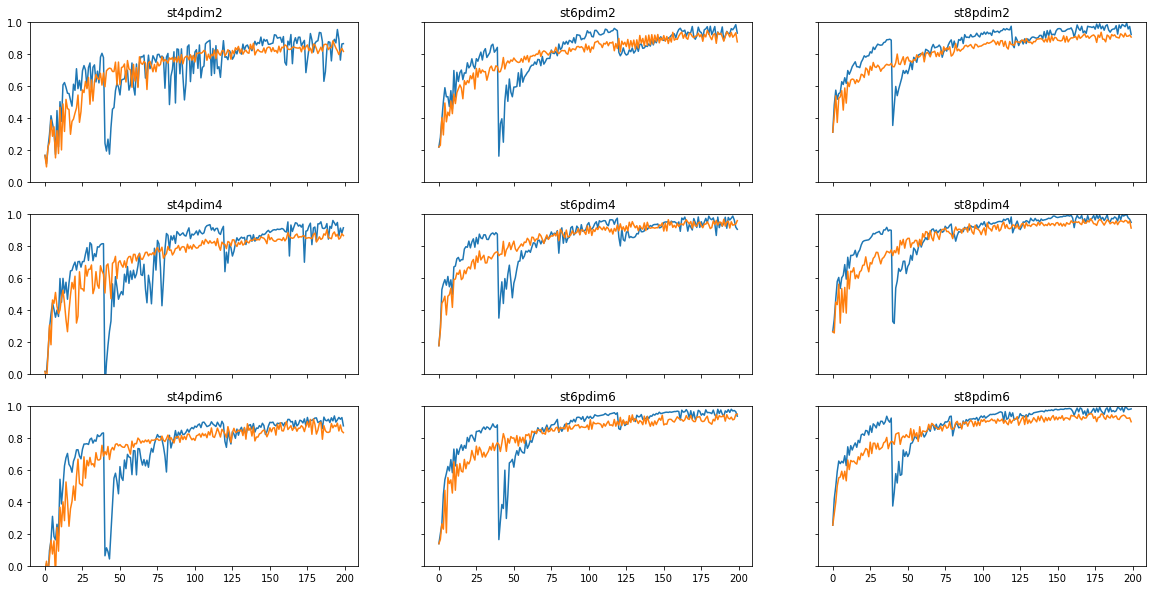

In [7]:
f,axar = plt.subplots(3,3,figsize=(20,10),sharey=True,sharex=True);axar=axar.reshape(-1)

for idx,(p,st) in enumerate(itertools.product(pdimL,stsizeL)):
  print(st,p)
  ax = axar[idx]
  for c in ['blocked','interleaved']:
    cdata = gsdata[(gsdata.condition==c)&(gsdata.pdim==p)&(gsdata.stsize == st)]
    acc = 1-cdata.loss
    ax.plot(np.arange(200),acc)
  ax.set_title('st%ipdim%i'%(st,p))
  ax.set_ylim(0,1)